# Machine Learning Project 1 - Prediction of Winning Fantasy Cricket Team

In [296]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import re
df=pd.read_csv('matches.csv')
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [300]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [302]:
# Checking for null values, if there taking total of null values 
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [304]:
# Printing 3 rows that most of columns as null values in order to drop
print(df[df['id'] == 501265])
print(df[df['id'] == 829763])
print(df[df['id'] == 1359519])

         id season   city        date match_type player_of_match  \
241  501265   2011  Delhi  2011-05-21     League             NaN   

                venue             team1          team2       toss_winner  \
241  Feroz Shah Kotla  Delhi Daredevils  Pune Warriors  Delhi Daredevils   

    toss_decision winner     result  result_margin  target_runs  target_overs  \
241           bat    NaN  no result            NaN          NaN           NaN   

    super_over method    umpire1    umpire2  
241          N    NaN  SS Hazare  RJ Tucker  
         id season       city        date match_type player_of_match  \
485  829763   2015  Bangalore  2015-04-29     League             NaN   

                     venue                        team1             team2  \
485  M Chinnaswamy Stadium  Royal Challengers Bangalore  Rajasthan Royals   

          toss_winner toss_decision winner     result  result_margin  \
485  Rajasthan Royals         field    NaN  no result            NaN   

     targe

In [306]:
# Filling and Replace null values
df['method'].fillna('Normal', inplace=True)
df['player_of_match'].fillna('No Player',inplace=True)
df['winner'].fillna('No Winner',inplace=True)
df['result_margin'].fillna(0.0,inplace=True)
# Dropping null value Rows
df.drop(df[df['id'] == 501265].index, inplace=True)
df.drop(df[df['id'] == 829763].index, inplace=True)
df.drop(df[df['id'] == 1359519].index, inplace=True)
# In City column, missing values 'Dubai' and 'Sharjah' it is filled by using apply function
df['city']=df['city'].fillna(df['venue'].apply(lambda x: 'Dubai' if x == 'International Cricket Stadium' else ('Sharjah' if x == 'Sharjah Cricket Stadium' else 'default')))

In [308]:
# Rechecking Any null values
df.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [310]:
# Checking any duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1090    False
1091    False
1092    False
1093    False
1094    False
Length: 1092, dtype: bool

In [312]:
# Dropping irrelevant columns
df.drop(['id'],axis=1,inplace=True)

In [11]:
# In date column has object as datatype , it need to change its datatype
df['date']

0       2008-04-18
1       2008-04-19
2       2008-04-19
3       2008-04-20
4       2008-04-20
           ...    
1090    2024-05-19
1091    2024-05-21
1092    2024-05-22
1093    2024-05-24
1094    2024-05-26
Name: date, Length: 1092, dtype: object

In [12]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date']

0      2008-04-18
1      2008-04-19
2      2008-04-19
3      2008-04-20
4      2008-04-20
          ...    
1090   2024-05-19
1091   2024-05-21
1092   2024-05-22
1093   2024-05-24
1094   2024-05-26
Name: date, Length: 1092, dtype: datetime64[ns]

In [13]:
# Splitting year,month,date into 3 columns
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [14]:
# Dropping date column after splitting
df.drop(['date'],axis=1,inplace=True)

In [15]:
# season column having values with '/' and without '/'
df['season']

0       2007/08
1       2007/08
2       2007/08
3       2007/08
4       2007/08
         ...   
1090       2024
1091       2024
1092       2024
1093       2024
1094       2024
Name: season, Length: 1092, dtype: object

In [16]:
# '/' removed from season column using apply fuction
def clean_season(season):
    if '/' in season:
        return season.split('/')[0]
    else:
        return season
df['season'] = df['season'].apply(clean_season)
df['season']

0       2007
1       2007
2       2007
3       2007
4       2007
        ... 
1090    2024
1091    2024
1092    2024
1093    2024
1094    2024
Name: season, Length: 1092, dtype: object

In [17]:
df.describe()

,result_margin,target_runs,target_overs,year,month,day
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,17.006410,165.684066,19.759341,2016.125458,4.827839,15.781136
std,21.726383,33.427048,1.581108,4.946813,1.613314,8.453067
min,0.000000,43.000000,5.000000,2008.000000,3.000000,1.000000
25%,5.000000,146.000000,20.000000,2012.000000,4.000000,9.000000
50%,8.000000,166.000000,20.000000,2016.000000,4.000000,16.000000
75%,19.250000,187.000000,20.000000,2021.000000,5.000000,23.000000
max,146.000000,288.000000,20.000000,2024.000000,11.000000,31.000000


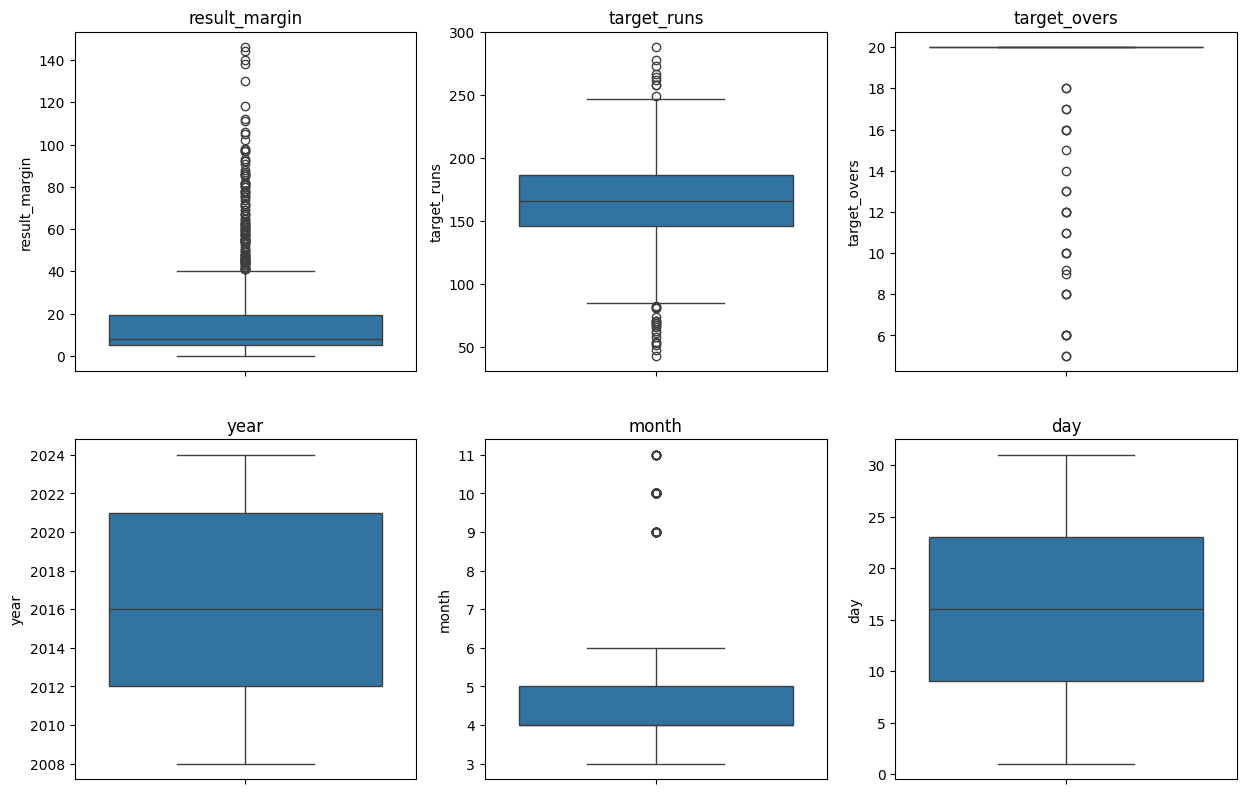

In [18]:
# Checking outliers in numerical columns using boxplot
plt.figure(figsize=(15,15))
Numericals=['result_margin','target_runs','target_overs','year','month','day']
plot=1
for i in Numericals:
    plt.subplot(3,3,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [19]:
# Removing outliers using IQR method
Numerical=['result_margin','target_runs','target_overs','year','month','day']
for i in Numerical:
    flag=True
    while(flag):
        q25,q75=np.percentile(df[i],[25,75])
        IQR=q75-q25
        lower_limit=q25-1.5*IQR
        upper_limit=q75+1.5*IQR
        if(df[i]<lower_limit).sum() or (df[i]>upper_limit).sum():
            df[i]=np.where(df[i]>upper_limit,upper_limit,df[i])
            df[i]=np.where(df[i]<lower_limit,upper_limit,df[i])
            flag=True
        else:
            flag=False

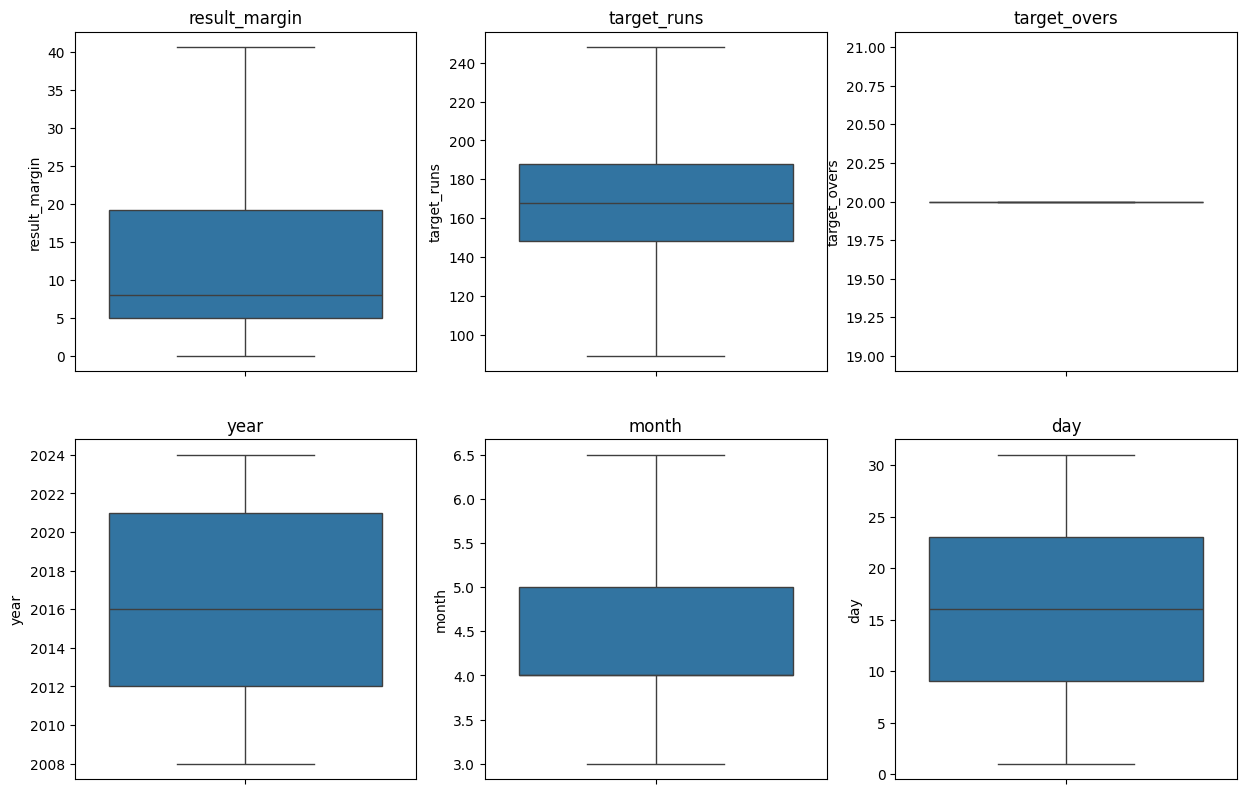

In [20]:
plt.figure(figsize=(15,15))
Numericals=['result_margin','target_runs','target_overs','year','month','day']
plot=1
for i in Numericals:
    plt.subplot(3,3,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [21]:
# Converting categorical columns into numerical columns using LabelEncoder
le=LabelEncoder()
categorical=['season','city','match_type','player_of_match','venue','team1','team2','toss_winner','toss_decision','winner','result','super_over','method','umpire1','umpire2']
for i in categorical:
    df[i]=le.fit_transform(df[i])

In [22]:
df

,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
0,0,2,4,37,23,16,8,16,1,8,...,40.625,223.0,20.0,0,1,9,41,2008,4.0,18
1,0,7,4,149,40,6,0,0,0,0,...,33.000,241.0,20.0,0,1,34,52,2008,4.0,19
2,0,10,4,150,16,3,13,13,0,3,...,9.000,130.0,20.0,0,1,8,15,2008,4.0,19
3,0,26,4,167,55,10,16,10,0,17,...,5.000,166.0,20.0,0,1,51,14,2008,4.0,20
4,0,23,4,57,14,8,1,1,0,8,...,5.000,111.0,20.0,0,1,10,24,2008,4.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,15,16,4,25,43,12,18,12,0,19,...,4.000,215.0,20.0,0,1,39,59,2024,5.0,19
1091,15,1,5,145,32,18,8,18,0,8,...,8.000,160.0,20.0,0,1,4,39,2024,5.0,21
1092,15,1,2,200,32,17,13,13,1,14,...,4.000,173.0,20.0,0,1,31,31,2024,5.0,22
1093,15,8,6,259,28,18,13,13,1,19,...,36.000,176.0,20.0,0,1,39,59,2024,5.0,24


In [23]:
# Split -Dependent and Independent Variables
x=df.drop(['winner'],axis=1)
x

,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
0,0,2,4,37,23,16,8,16,1,1,40.625,223.0,20.0,0,1,9,41,2008,4.0,18
1,0,7,4,149,40,6,0,0,0,1,33.000,241.0,20.0,0,1,34,52,2008,4.0,19
2,0,10,4,150,16,3,13,13,0,3,9.000,130.0,20.0,0,1,8,15,2008,4.0,19
3,0,26,4,167,55,10,16,10,0,3,5.000,166.0,20.0,0,1,51,14,2008,4.0,20
4,0,23,4,57,14,8,1,1,0,3,5.000,111.0,20.0,0,1,10,24,2008,4.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,15,16,4,25,43,12,18,12,0,3,4.000,215.0,20.0,0,1,39,59,2024,5.0,19
1091,15,1,5,145,32,18,8,18,0,3,8.000,160.0,20.0,0,1,4,39,2024,5.0,21
1092,15,1,2,200,32,17,13,13,1,3,4.000,173.0,20.0,0,1,31,31,2024,5.0,22
1093,15,8,6,259,28,18,13,13,1,1,36.000,176.0,20.0,0,1,39,59,2024,5.0,24


In [24]:
y=df.winner
y

0        8
1        0
2        3
3       17
4        8
        ..
1090    19
1091     8
1092    14
1093    19
1094     8
Name: winner, Length: 1092, dtype: int32

In [292]:
# Getting irrelevant and relevant colums
rf_model = RandomForestClassifier(random_state=42).fit(x, y)
feature_importance = rf_model.feature_importances_
threshold = 0.01
relevant_features = [x.columns[i] for i, importance in enumerate(feature_importance) if importance >= threshold]
irrelevant_features = [x.columns[i] for i, importance in enumerate(feature_importance) if importance < threshold]
print("Relevant Features:", relevant_features)
print("Irrelevant Features:", irrelevant_features)

Relevant Features: ['season', 'city', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'result_margin', 'target_runs', 'umpire1', 'umpire2', 'year', 'month', 'day']
Irrelevant Features: []


In [26]:
# Finding best model using cross_val_score
cross={'Logistic':{'model':LogisticRegression()},
     'Decision':{'model':DecisionTreeClassifier()},
     'Random':{'model':RandomForestClassifier()},
     'SVC':{'model':SVC()},
     'Catboost':{"model":CatBoostClassifier()},
     'Guassian':{"model":GaussianNB()},
     'KNeighbour':{"model":KNeighborsClassifier()}}

scores=[]
accuracy=[]
for i in cross:
    cvs=cross_val_score(cross[i]['model'],X=x,y=y,cv=10,scoring="accuracy", n_jobs=-1)
    acc=np.mean(cvs)
    scores.append({'model':cross[i]['model'],'score':cvs})
    accuracy.append({'model':cross[i]['model'],'accuracy':acc})

In [27]:
scores

[{'model': LogisticRegression(),
  'score': array([0.22727273, 0.26363636, 0.26605505, 0.28440367, 0.2293578 ,
         0.19266055, 0.21100917, 0.13761468, 0.16513761, 0.14678899])},
 {'model': DecisionTreeClassifier(),
  'score': array([0.48181818, 0.37272727, 0.53211009, 0.41284404, 0.44036697,
         0.44954128, 0.49541284, 0.50458716, 0.52293578, 0.41284404])},
 {'model': RandomForestClassifier(),
  'score': array([0.45454545, 0.45454545, 0.60550459, 0.63302752, 0.58715596,
         0.50458716, 0.59633028, 0.50458716, 0.47706422, 0.33944954])},
 {'model': SVC(),
  'score': array([0.12727273, 0.13636364, 0.13761468, 0.13761468, 0.13761468,
         0.12844037, 0.12844037, 0.12844037, 0.12844037, 0.12844037])},
 {'model': <catboost.core.CatBoostClassifier at 0x1e5ced21910>,
  'score': array([0.62727273, 0.57272727, 0.68807339, 0.68807339, 0.74311927,
         0.71559633, 0.82568807, 0.75229358, 0.76146789, 0.68807339])},
 {'model': GaussianNB(),
  'score': array([0.13636364, 0.0818

In [28]:
accuracy

[{'model': LogisticRegression(), 'accuracy': 0.2123936613844871},
 {'model': DecisionTreeClassifier(), 'accuracy': 0.4625187656380317},
 {'model': RandomForestClassifier(), 'accuracy': 0.5156797331109259},
 {'model': SVC(), 'accuracy': 0.13186822351959968},
 {'model': <catboost.core.CatBoostClassifier at 0x1e5ced21910>,
  'accuracy': 0.7062385321100917},
 {'model': GaussianNB(), 'accuracy': 0.10255212677231026},
 {'model': KNeighborsClassifier(), 'accuracy': 0.17216847372810676}]

In [100]:
x = df.drop(['winner', 'match_type', 'target_overs', 'super_over', 'method'], axis=1)
x

,season,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,result,result_margin,target_runs,umpire1,umpire2,year,month,day
0,0,2,37,23,16,8,16,1,1,40.625,223.0,9,41,2008,4.0,18
1,0,7,149,40,6,0,0,0,1,33.000,241.0,34,52,2008,4.0,19
2,0,10,150,16,3,13,13,0,3,9.000,130.0,8,15,2008,4.0,19
3,0,26,167,55,10,16,10,0,3,5.000,166.0,51,14,2008,4.0,20
4,0,23,57,14,8,1,1,0,3,5.000,111.0,10,24,2008,4.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,15,16,25,43,12,18,12,0,3,4.000,215.0,39,59,2024,5.0,19
1091,15,1,145,32,18,8,18,0,3,8.000,160.0,4,39,2024,5.0,21
1092,15,1,200,32,17,13,13,1,3,4.000,173.0,31,31,2024,5.0,22
1093,15,8,259,28,18,13,13,1,1,36.000,176.0,39,59,2024,5.0,24


In [102]:
y=df.winner
y

0        8
1        0
2        3
3       17
4        8
        ..
1090    19
1091     8
1092    14
1093    19
1094     8
Name: winner, Length: 1092, dtype: int32

In [248]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=48)
print(len(xtrain), len(ytrain))
print(len(xtest), len(ytest))

764 764
328 328


In [30]:

# RandomForest
rf_param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2,4],
    'max_features': ['sqrt','log2']
}

rf_model = RandomForestClassifier()
rf_rs = RandomizedSearchCV(rf_model, rf_param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
print("Tuning RandomForest...")
rf_rs.fit(xtrain, ytrain)
rf_score = {'model': 'RandomForest', 'best_params': rf_rs.best_params_, 'best_score': rf_rs.best_score_}
print("RandomForest tuning completed!")

# DecisionTree
dt_param_grid = {
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt','log2']
}

dt_model = DecisionTreeClassifier()
dt_rs = RandomizedSearchCV(dt_model, dt_param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
print("Tuning DecisionTree...")
dt_rs.fit(xtrain, ytrain)
dt_score = {'model': 'DecisionTree', 'best_params': dt_rs.best_params_, 'best_score': dt_rs.best_score_}
print("DecisionTree tuning completed!")

catboost_param_grid = {
    'iterations': [200, 500],
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5],
    'border_count': [64],
    'bagging_temperature': [0.5],
    'min_data_in_leaf': [5, 10],
}
catboost_model = CatBoostClassifier(thread_count=-1,verbose=1)
catboost_rs = RandomizedSearchCV(catboost_model, catboost_param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
print("Tuning CatBoost...")
catboost_rs.fit(xtrain, ytrain)
catboost_score = {'model': 'CatBoost', 'best_params': catboost_rs.best_params_, 'best_score': catboost_rs.best_score_}
print("CatBoost tuning completed!")

# Combine Scores
scores = [catboost_score, rf_score, dt_score]

Tuning RandomForest...
RandomForest tuning completed!
Tuning DecisionTree...
DecisionTree tuning completed!
Tuning CatBoost...
0:	learn: 2.9133061	total: 156ms	remaining: 1m 17s
1:	learn: 2.8681622	total: 169ms	remaining: 42.1s
2:	learn: 2.7886004	total: 181ms	remaining: 29.9s
3:	learn: 2.7383280	total: 192ms	remaining: 23.8s
4:	learn: 2.7012511	total: 203ms	remaining: 20.1s
5:	learn: 2.6411921	total: 216ms	remaining: 17.8s
6:	learn: 2.5861680	total: 231ms	remaining: 16.3s
7:	learn: 2.5415971	total: 245ms	remaining: 15.1s
8:	learn: 2.4925782	total: 257ms	remaining: 14s
9:	learn: 2.4318547	total: 269ms	remaining: 13.2s
10:	learn: 2.3875433	total: 282ms	remaining: 12.5s
11:	learn: 2.3410380	total: 294ms	remaining: 11.9s
12:	learn: 2.3124633	total: 306ms	remaining: 11.4s
13:	learn: 2.2863868	total: 316ms	remaining: 11s
14:	learn: 2.2529648	total: 328ms	remaining: 10.6s
15:	learn: 2.2094672	total: 338ms	remaining: 10.2s
16:	learn: 2.1750688	total: 348ms	remaining: 9.9s
17:	learn: 2.1380808

In [31]:
scores

[{'model': 'CatBoost',
  'best_params': {'min_data_in_leaf': 10,
   'learning_rate': 0.1,
   'l2_leaf_reg': 5,
   'iterations': 500,
   'depth': 6,
   'border_count': 64,
   'bagging_temperature': 0.5},
  'best_score': 0.6361123977149915},
 {'model': 'RandomForest',
  'best_params': {'n_estimators': 500,
   'min_samples_split': 5,
   'min_samples_leaf': 2,
   'max_features': 'sqrt',
   'max_depth': 20},
  'best_score': 0.5497555452627245},
 {'model': 'DecisionTree',
  'best_params': {'splitter': 'best',
   'min_samples_split': 10,
   'min_samples_leaf': 2,
   'max_features': 'log2',
   'max_depth': 20,
   'criterion': 'entropy'},
  'best_score': 0.286645051721476}]

In [250]:
model=CatBoostClassifier(learning_rate=0.1,l2_leaf_reg=5,iterations=500,depth=6,border_count= 64,bagging_temperature=0.5,min_data_in_leaf=10)
model.fit(xtrain,ytrain)

0:	learn: 2.8949299	total: 10.5ms	remaining: 5.25s
1:	learn: 2.8256378	total: 20ms	remaining: 4.99s
2:	learn: 2.7817132	total: 29.3ms	remaining: 4.86s
3:	learn: 2.7189427	total: 33.3ms	remaining: 4.13s
4:	learn: 2.6885254	total: 42.5ms	remaining: 4.2s
5:	learn: 2.6346037	total: 51.4ms	remaining: 4.23s
6:	learn: 2.5921324	total: 63.6ms	remaining: 4.48s
7:	learn: 2.5354590	total: 73.4ms	remaining: 4.51s
8:	learn: 2.4905163	total: 82.9ms	remaining: 4.52s
9:	learn: 2.4504263	total: 93.5ms	remaining: 4.58s
10:	learn: 2.4153835	total: 102ms	remaining: 4.54s
11:	learn: 2.3537062	total: 112ms	remaining: 4.57s
12:	learn: 2.3062115	total: 121ms	remaining: 4.55s
13:	learn: 2.2771934	total: 131ms	remaining: 4.53s
14:	learn: 2.2474392	total: 140ms	remaining: 4.51s
15:	learn: 2.2151906	total: 148ms	remaining: 4.48s
16:	learn: 2.1842372	total: 157ms	remaining: 4.46s
17:	learn: 2.1595259	total: 166ms	remaining: 4.43s
18:	learn: 2.1302646	total: 175ms	remaining: 4.43s
19:	learn: 2.1042312	total: 183ms	

In [252]:
xtrain

,season,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,result,result_margin,target_runs,umpire1,umpire2,year,month,day
949,13,1,80,32,13,5,13,0,3,7.000,131.0,15,36,2022,5.0,29
1076,15,11,210,19,0,12,12,1,1,28.000,168.0,1,58,2024,5.0,5
1074,15,26,280,56,8,10,10,1,1,24.000,170.0,25,56,2024,5.0,3
330,4,26,113,55,10,3,10,0,1,40.625,210.0,32,58,2013,4.0,9
868,12,12,118,13,0,12,12,1,3,6.000,135.0,30,43,2021,6.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,5,26,240,5,0,10,0,1,3,7.000,174.0,58,9,2014,5.0,28
968,14,23,77,15,18,8,8,1,1,23.000,229.0,15,16,2023,4.0,14
946,13,23,52,15,13,5,5,1,3,7.000,189.0,12,59,2022,5.0,24
348,4,2,209,23,16,13,16,1,3,7.000,118.0,8,11,2013,4.0,20


In [254]:
ytrain

949      5
1076     0
1074     8
330     10
868     13
        ..
455      0
968     19
946      5
348     17
565     16
Name: winner, Length: 764, dtype: int32

In [256]:
model.score(xtest,ytest)

0.75

In [258]:
label= ['Chennai Super Kings','Deccan Chargers','Delhi Capitals','Delhi Daredevils','Gujarat Lions','Gujarat Titans','Kings XI Punjab',
    'Kochi Tuskers Kerala','Kolkata Knight Riders','Lucknow Super Giants','Mumbai Indians','Punjab Kings','Pune Warriors','Rajasthan Royals',
    'Rising Pune Supergiant','Rising Pune Supergiants','Royal Challengers Bangalore','Royal Challengers Bengaluru','Sunrisers Hyderabad']

In [260]:
# testing with existing data
output1 = model.predict([[0,7,239,40,6,13,13,1,1,40.625,222.0,51,24,2008,5.0,28]])[0]
output1 = int(output1)
print(label[output1])

Kings XI Punjab


In [268]:
# testing with existing data
output2 = model.predict([[5, 26, 240, 5, 0, 10, 0, 1, 3, 7.000, 174.0, 58, 9, 2014, 5.0, 28]])[0]
output2 = int(output2)
print(label[output2])

Chennai Super Kings


In [270]:
# giving new data for predicition
output3 = model.predict([[4,2,19,21,16,3,3,2,2,20.000,158.0,47,46,2024,4.0,9]])[0]
output3 = int(output3)
print(label[output3])

Royal Challengers Bengaluru


In [272]:
# giving new data for predicition
output4 = model.predict([[1,9,19,29,16,4,4,2,2,30.000,188.0,45,49,2027,6.0,8]])[0]
output4 = int(output4)
print(label[output4])

Royal Challengers Bengaluru


In [274]:
ypred=model.predict(xtest)
ypred

array([[17],
       [ 0],
       [19],
       [17],
       [19],
       [ 0],
       [ 5],
       [ 0],
       [14],
       [ 6],
       [ 0],
       [ 0],
       [ 6],
       [19],
       [ 6],
       [ 8],
       [ 0],
       [ 2],
       [14],
       [ 6],
       [ 2],
       [14],
       [19],
       [10],
       [ 0],
       [19],
       [14],
       [10],
       [10],
       [10],
       [ 0],
       [ 2],
       [17],
       [ 6],
       [17],
       [ 0],
       [17],
       [17],
       [17],
       [14],
       [17],
       [10],
       [ 2],
       [ 1],
       [10],
       [ 2],
       [19],
       [ 8],
       [14],
       [ 8],
       [10],
       [10],
       [17],
       [ 0],
       [10],
       [ 0],
       [19],
       [19],
       [ 6],
       [ 8],
       [ 6],
       [19],
       [10],
       [17],
       [ 0],
       [ 0],
       [17],
       [15],
       [10],
       [ 8],
       [ 8],
       [ 0],
       [14],
       [ 3],
       [17],
       [ 0],
       [ 2],

In [276]:
ytest

770    17
472    14
852    13
432    14
714    10
       ..
671    19
410     0
986    14
68      1
974    10
Name: winner, Length: 328, dtype: int32

In [278]:
cm=confusion_matrix(ytest,ypred)
cm

array([[41,  1,  0,  1,  0,  0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,
         1,  0,  0],
       [ 0,  3,  0,  2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  1, 10,  0,  0,  1,  0,  3,  0,  1,  0,  0,  0,  1,  0,
         0,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 2,  0,  0,  1,  0,  0, 21,  0,  3,  0,  1,  0,  1,  0,  0,  0,
         4,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 4,  0,  0,  1,  0,  0,  1,  0, 31,  0,  3,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 1,  0,  0,  3,  0,  0,  2,  0,  1,  1, 32,  0,  0,  0,  1,  0

<Axes: >

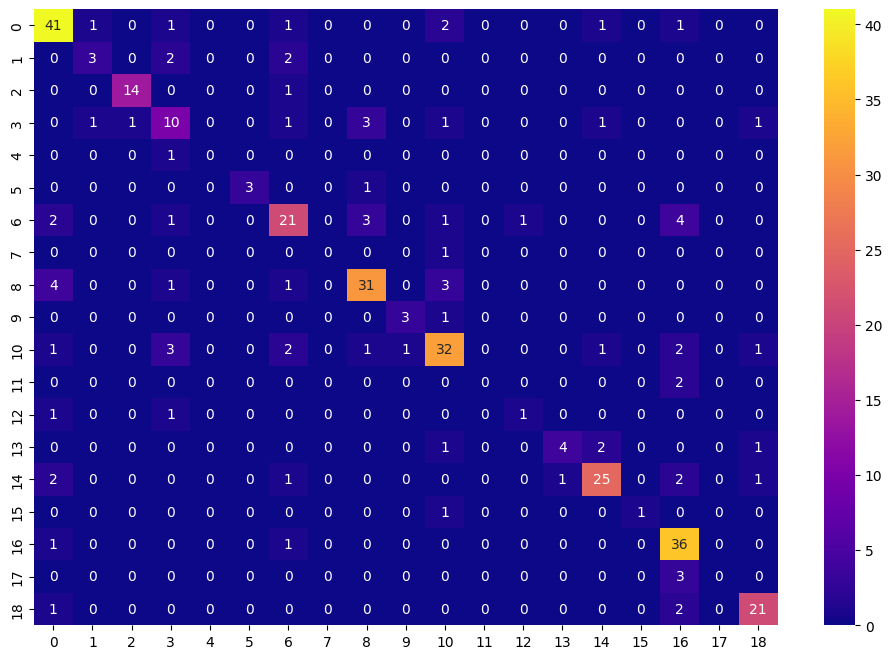

In [290]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm,annot=True,fmt='d',cmap='plasma')

In [282]:
print("Accuracy Score : ",accuracy_score(ytest,ypred))

Accuracy Score :  0.75
